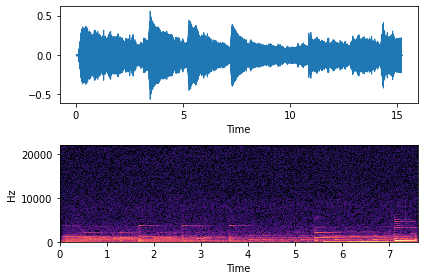

In [ ]:
import pandas as pd
import os, sys
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import scipy.io.wavfile as wavf

x, sr = librosa.load('/content/Franz Schubert - Impromptu No.3, Op. 90(D899).wav', sr = 44100)

fig, axes = plt.subplots(2,1)

dt = 1/44100

# 1. plotting the waveform
librosa.display.waveshow(x, ax=axes[0])

# 2. plotting the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
# do stft then display spectrogam
img = librosa.display.specshow(D, y_axis='linear',x_axis='time', sr=sr, ax=axes[1])
fig.tight_layout()
plt.show()
Audio(data = x, rate = 44100)

In [ ]:
def filtering(signal):
    t = np.arange(0, len(x)/sr, dt)
    ## Compute Fourier Transform
    n = len(t)
    fhat = np.fft.fft(signal, n) #computes the fft
    psd = fhat * np.conj(fhat)/n
    freq = (1/(dt*n)) * np.arange(n) #frequency array
    idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32) #first half index
    ## Filter out noise
    threshold = 0.005
    psd_idxs = (psd > threshold) #array of 0 and 1
    psd_clean = psd * psd_idxs #zero out all the unnecessary powers
    fhat_clean = psd_idxs * fhat #used to retrieve the signal
    signal_filtered = np.fft.ifft(fhat_clean) #inverse fourier transform
    return signal_filtered,psd

In [ ]:
def visualization(dt, signal,signal_filtered,psd):
    ## Visualization
    t = np.arange(0, len(signal)/sr, dt)
    n = len(t)
    freq = (1/(dt*n))*np.arange(n)
    L = np.arange(1,np.floor(n/2),dtype = int)
    minsignal, maxsignal = signal.min(), signal.max()
    plt.plot(freq[L],psd[L],color= "c")
    plt.xlim(freq[L[0]],freq[L[-1]]/2)
    plt.ylim(0,0.02)
    plt.ylabel("PSD")

    plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


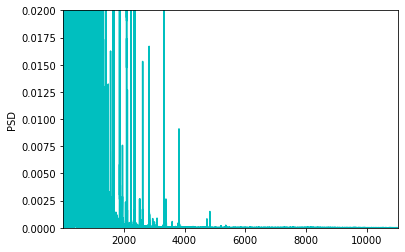

/usr/local/lib/python3.8/dist-packages/IPython/lib/display.py:158: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [ ]:
# filtered_signal, psd= filtering(noisy_nokia)
filtered_signal, psd= filtering(x)
visualization(dt,x,filtered_signal,psd)
Audio(data= filtered_signal , rate=44100)
